# Python: Visualize Statistical Relationships with Seaborn

### On Seaborn’s official website, they state:

If matplotlib “tries to make easy things easy and hard things possible”, 
seaborn makes a well-defined set of hard things easy too, including:

- Using default themes that are aesthetically pleasing.
- Setting custom color palettes.
- Making attractive statistical plots.
- Easily and flexibly displaying distributions.
- Visualizing information from matrices and DataFrames.

Here, Seaborn is our tool of choice for Exploratory Analysis. 

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human eye can see trends and patterns that indicate a relationship.

## Overview of seaborn plotting functions

Most of your interactions with seaborn will happen through a set of plotting functions.
<img src="structure.png" alt="import data" width="350"/>



In [1]:
## Importing libraries

# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization of graphs
from matplotlib import pyplot as plt
%matplotlib inline

# Then, we'll import the Seaborn library, which is the star of today's show.
# Seaborn for plotting and styling
import seaborn as sns

# Tip: Each library has an alias. We will invoke Pandas with pd, Matplotlib with plt, and Seaborn with sns.

In [2]:
# Load our dataset with Pandas read_csv()

# Read dataset
df = pd.read_csv("Pokemon.csv", index_col=0)

# Tip: The argument  index_col=0 means the first column of the dataset is the ID column.

# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
id,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Seaborn's plotting functions.
One of Seaborn's greatest strengths is its diversity of plotting functions. 

For instance, making a scatter plot is just one line of code using the `lmplot()` function.

- Pass your DataFrame to the `data=` argument, and column names to axes arguments, `x=` and `y=`.



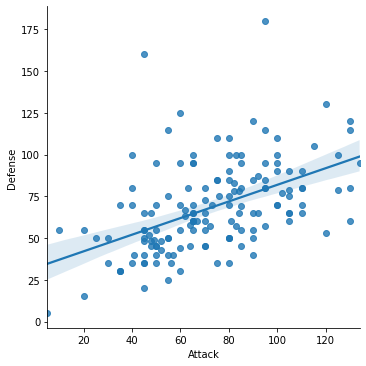

In [3]:
# Plot a scatter plot
sns.lmplot(x='Attack', y='Defense', data=df)


We used Seaborn's function for fitting and plotting a regression line.

If we just want a scatterplot, `fit_reg=False` to remove the regression line

Then, set `hue='Stage'` to color our points by the Pokémon's evolution stage. 


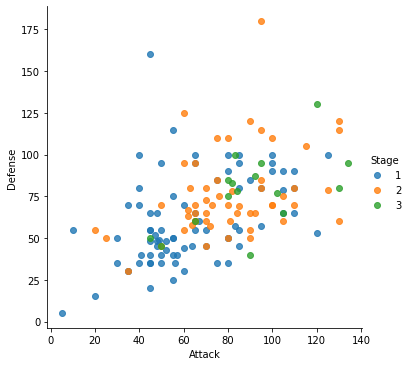

In [4]:
# Scatterplot arguments

sns.lmplot(x='Attack', y='Defense', data=df,
           hue='Stage', # Color by evolution stage
           fit_reg=False) # No regression line

### Relating variables with scatter plots

A mainstay of statistical visualization! 
There are several ways to draw a scatter plot in seaborn. 
`scatterplot()` is the default kind in `relplot()` 

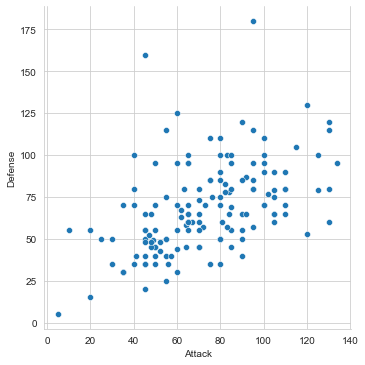

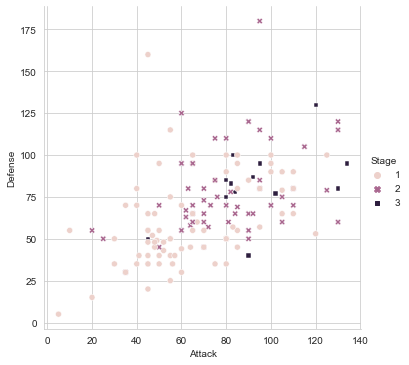

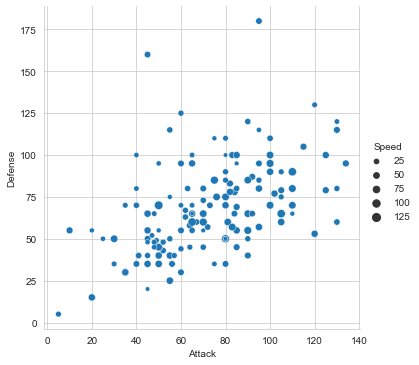

In [19]:
sns.relplot(x='Attack', y='Defense', data=df);

# Use matplotlib to make changes
# plt.xlim([0,max(df.Attack)])
# plt.ylim([0,df.Defense.max()])

# To emphasize the difference between the classes, 
# and to improve accessibility, use a different marker 
# style for each class:
sns.relplot(x='Attack', y='Defense', data=df,
            hue="Stage", style="Stage");


# The third kind of semantic variable changes the size of each point:
sns.relplot(x='Attack', y='Defense', data=df,
            size="Speed");
      


# Seaborn themes.
The default theme is called 'darkgrid'.
Next, we'll change the theme to 'whitegrid' while making box plots.

Boxplots show the distribution through the summary statistics.
For example, we can visualize the Attack by Pokémon's primary type:

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

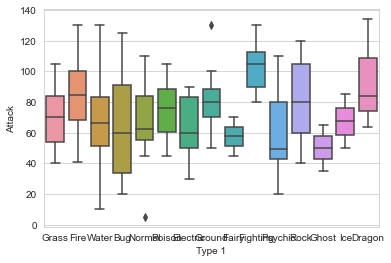

In [20]:
# Set theme
sns.set_style('whitegrid')
 
# Box plot or violinplot
sns.boxplot(x='Type 1', y='Attack', data=df)

# Use matplotlib to make adjustments
#plt.xticks(rotation=-45)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

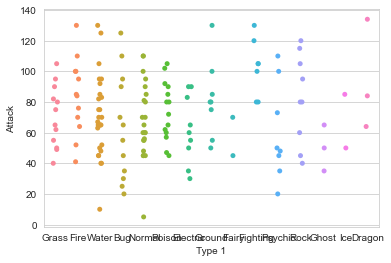

In [6]:
# Swarm plot with Pokemon color palette
sns.stripplot(x='Type 1', y='Attack', data=df)

### Overlaying plots.

- Make our figure larger using Matplotlib.
- Plot the strip plot. 
- Set a title using Matplotlib.


Text(0.5, 1.0, 'Attack by Type')

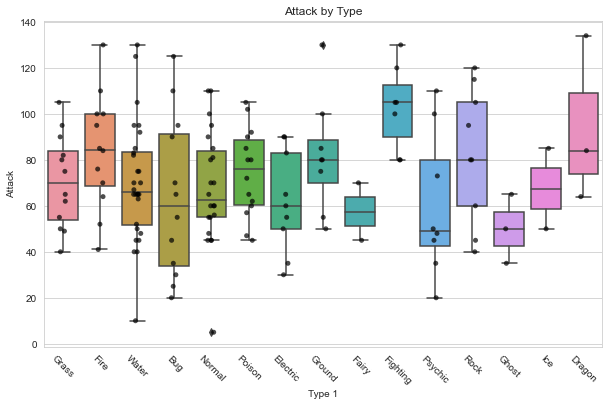

In [7]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
# Create plot
sns.boxplot(x="Type 1",
            y='Attack',
            data=df) # Remove the bars inside)
sns.stripplot(x='Type 1', y='Attack', data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
            # Set title with matplotlib
    
plt.xticks(rotation=-45)
plt.title('Attack by Type')

# Distribution Plot (a.k.a. Histogram)
Histograms allow you to plot the distributions of numeric variables.

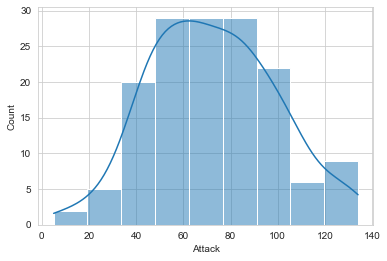

In [8]:

sns.histplot(df.Attack, kde=True)
?sns.histplot

# Bar Plot
Bar plots help you visualize the distributions of categorical variables.


<AxesSubplot:xlabel='Type 1', ylabel='count'>

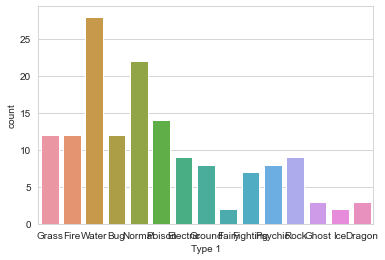

In [21]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df)
 
# Rotate x-labels
#plt.xticks(rotation=-45)

# Factor Plot
Factor plots make it easy to separate plots by categorical classes.


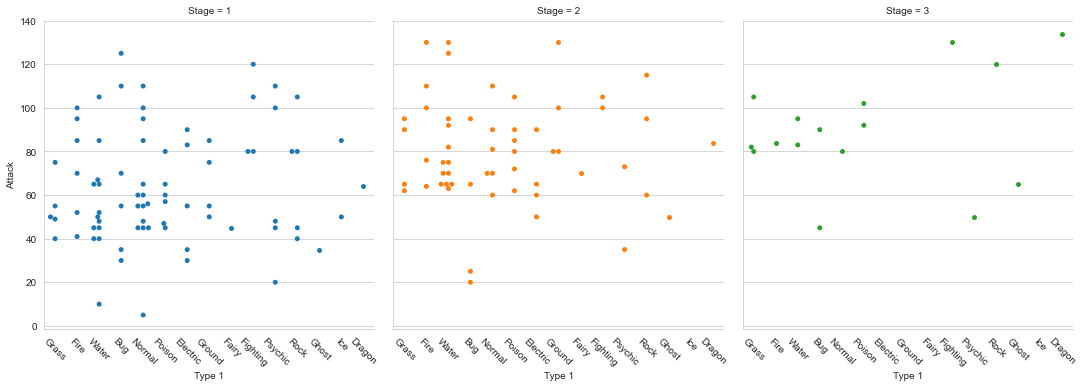

In [33]:
# Category (factor) Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

# Density Plot
Density plots display the distribution between two variables.

Tip: Consider overlaying this with a scatter plot.


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

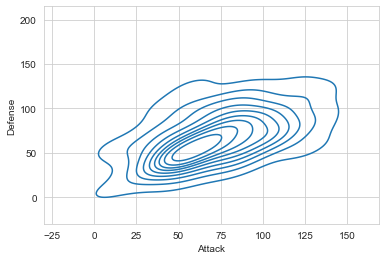

In [26]:
# Density Plot
sns.kdeplot(x='Attack', y='Defense', data=df)

# Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.


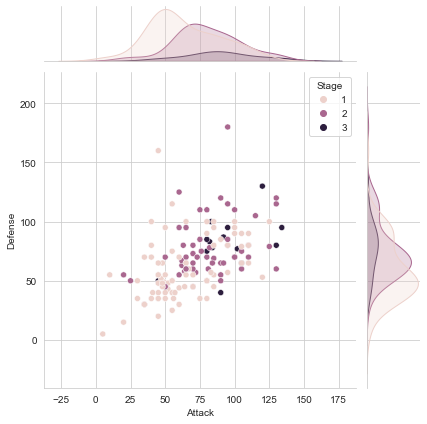

In [34]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df, hue='Stage')

We can also look at some other data for variety.  Here is some penguin data!

In [10]:
# Load the built-in dataset penguins
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We can look at stacked histograms to see how the distribution varies by species

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

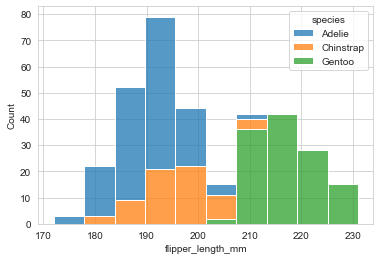

In [11]:

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

# Along with similar, but perhaps less familiar, 
# options such as kernel density estimation:

# sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")


## Figure-level functions

`displot()` is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as `histplot()` behind the scenes:


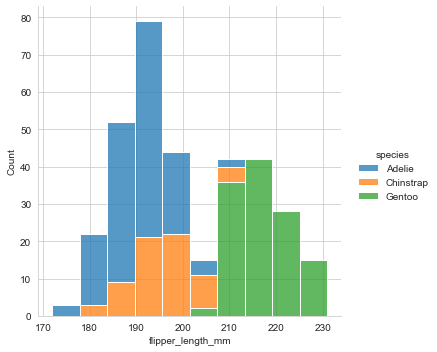

In [42]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

# To draw a kernel density plot instead, using the 
# same code as kdeplot(), select it using the kind parameter:
# sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")


You’ll notice that the figure-level plots look mostly like their axes-level counterparts, but there are a few differences. Notably, the legend is placed ouside the plot.

The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots. 


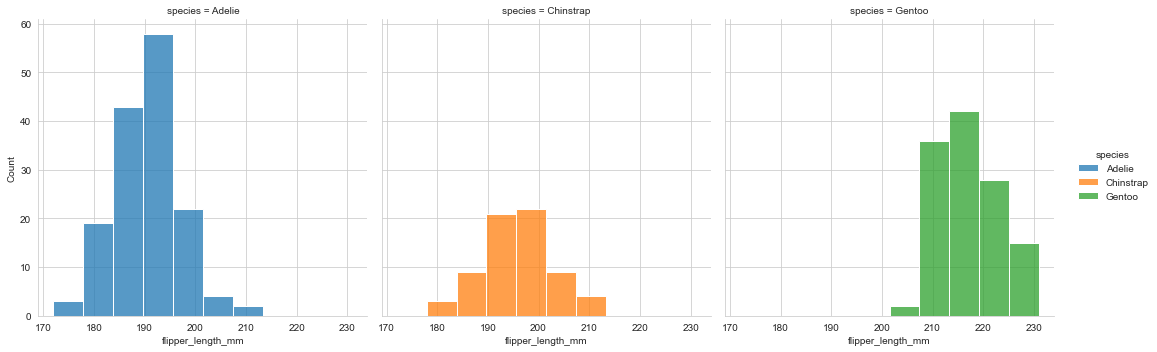

In [31]:
# For example, instead of stacking the three distributions 
# for each species of penguins in the same axes, we can 
# “facet” them by plotting each distribution across the 
# columns of the figure:
    
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")


## Make self-contained plots
The `ax=` argument lets you specify exactly where each plot should go:


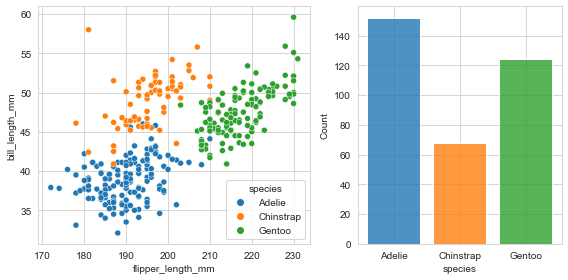

In [32]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))

sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])

sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])

f.tight_layout()


`pairplot()` combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

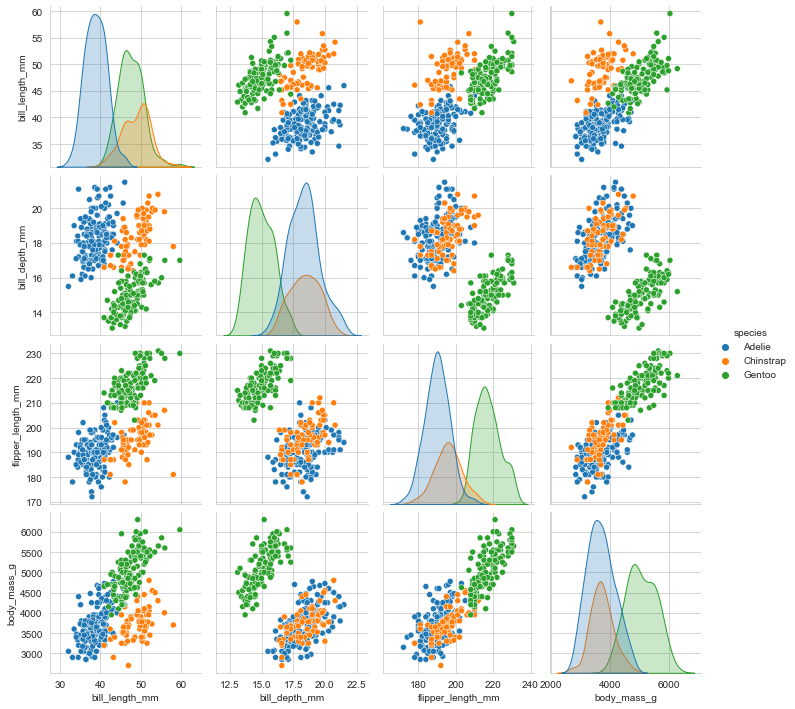

In [55]:
sns.pairplot(data=penguins, hue="species")


# Line plots for continuous data
With some datasets, you may want to understand changes in one variable as a function of time, or a continuous variable. 

In seaborn, you can use `lineplot()` or `relplot()` with `kind="line"`:


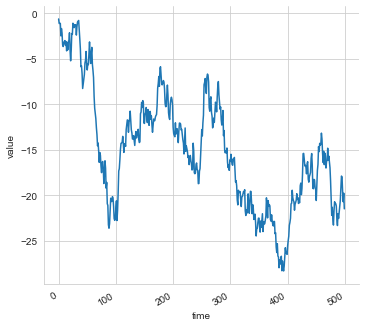

In [23]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df, ci=True)
g.fig.autofmt_xdate()


### Aggregation and representing uncertainty
More complex datasets will have multiple measurements for the same value of the x variable.

This seaborn data is from this paper: https://pubmed.ncbi.nlm.nih.gov/26733531/



In [29]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:


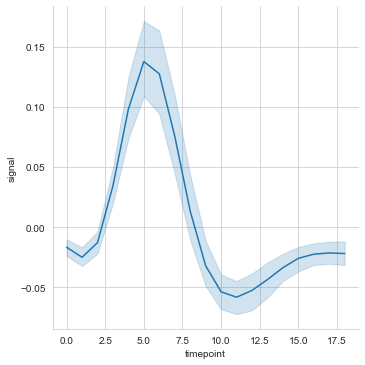

In [27]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

# The confidence intervals are computed using bootstrapping, 
# which can be time-intensive for larger datasets. 
# It’s therefore possible to disable them: ci=None
# You can also use the standard deviation, ci="sd"

### Plotting subsets of data with mappings
`lineplot()` can show up to three additional variables by modifying the hue, size, and style of the plot elements. 


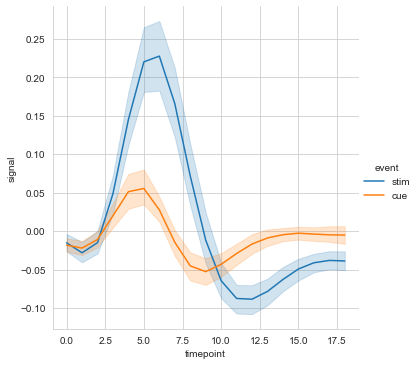

In [28]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);


Adding a style to a line plot changes the pattern of dashes in the line by default:


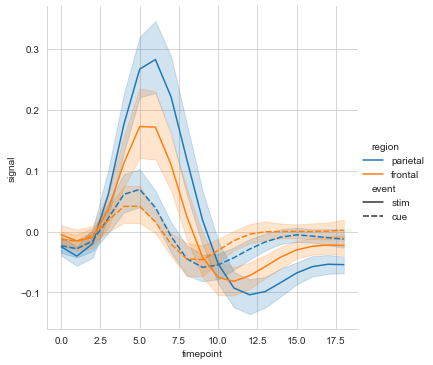

In [73]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);


As with scatter plots, be cautious about making line plots using multiple semantics. Make sure your plots are accessible!


### Seeing all the repeated measures
When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:


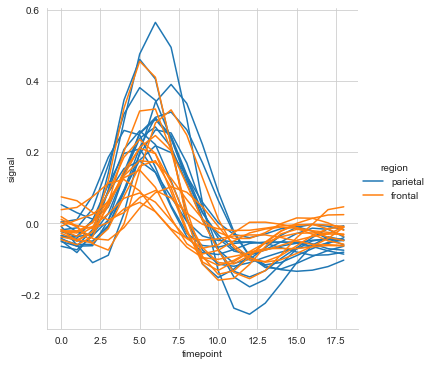

In [76]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));


Plotting with date data
Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:


You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:


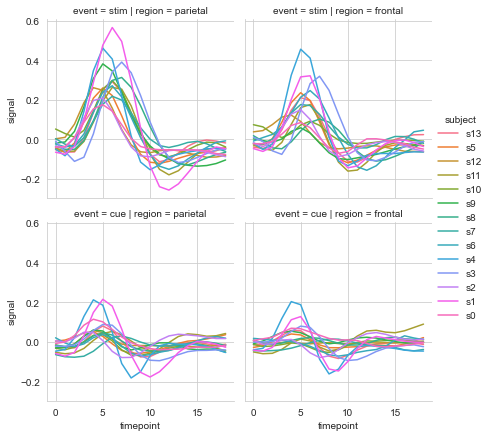

In [83]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);


When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:


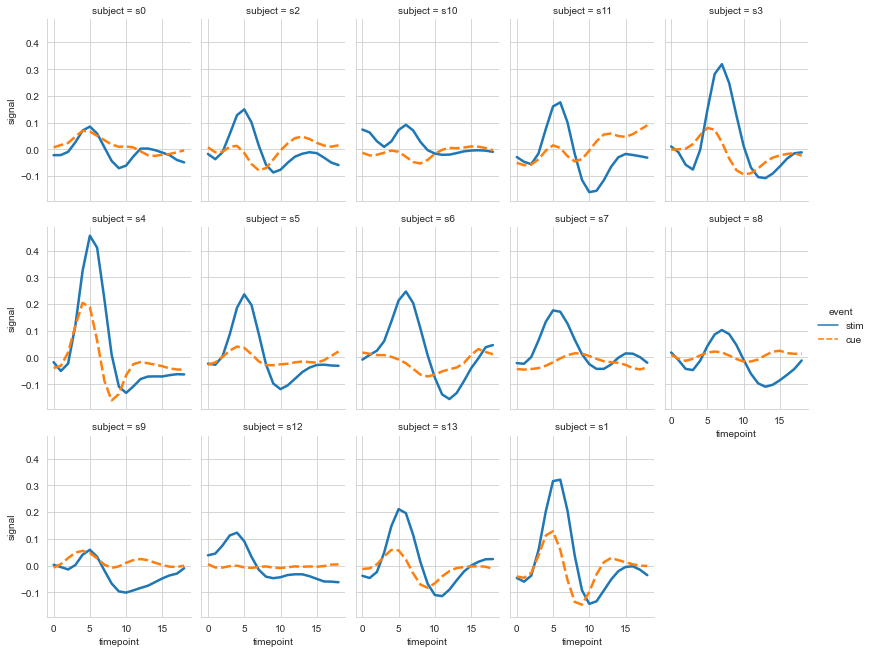

In [84]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));


These visualizations, which are often called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. 

Several simple plots are usually more effective than one complex plot.

### References  

This lesson was adapted from the [Seaborn user guide and tutorial](https://seaborn.pydata.org/tutorial.html) and [Elite Data Science: Python Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial)
